# WEEK14 SUPERHERO MOVIES

Name: **Syron B. Viason** <br>
Course: **CPE2A**

# **Introduction**

This data analysis presents a sample of superhero movies released between 1952 and 2023, based solely on the provided dataset. External sources are not included to maintain data consistency and accuracy.
Over the years, superhero movies have undergone significant changes in ratings, runtime, and overall reception. This study examines trends in IMDb scores and other key factors to provide insights into the evolution of the genre within the given dataset.

<hr style=\"border:2.5px solid #126782\"></hr>

# **Data Cleaning**

In [7]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')




In [8]:
df = pd.read_csv(r"c:/Users/richard/Downloads/Syron Folder/Assignments/MATHEDA/WK14 EDA Activity 3 - Data Analysis/raw/vs-dataset.csv",
                 delimiter=",", encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1657 non-null   object 
 3   Genre        1683 non-null   object 
 4   RunTime      1690 non-null   object 
 5   Description  1690 non-null   object 
 6   IMDB_Score   1690 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 92.6+ KB


## Fixing/ Converting Data 

Data has additional string values that need to be converted to be uniform 

In [9]:
def extract_year(value):

    match = re.search(r'\d{4}', str(value)) 

    if match:

        return match.group(0)  

    return None  


df['Year'] = df['Year'].apply(extract_year)
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
df['RunTime'] = df['RunTime'].astype(str).str.replace('min', '').str.strip()  
df['RunTime'] = pd.to_numeric(df['RunTime'], errors='coerce') 

# Overview

In [10]:
df.head()

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
0,0,Eternals,2021-01-01,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0
1,1,Loki,2021-01-01,"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0
2,2,The Falcon and the Winter Soldier,2021-01-01,"Action,Adventure,Drama",50,"Following the events of 'Avengers: Endgame,' S...",7.5
3,3,WandaVision,2021-01-01,"Action,Comedy,Drama",350,Blends the style of classic sitcoms with the M...,8.1
4,4,Spider-Man: No Way Home,2021-01-01,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0


## Data Cleaning - Dropping NaN

Dropping NaN values

In [11]:
df_dropcopy = df.copy()
df_dropcopy.isna().sum()

ID              0
Movie           0
Year           35
Genre           7
RunTime         0
Description     0
IMDB_Score      0
dtype: int64

In [12]:
df_dropcopy = df_dropcopy.dropna(subset=['Year','Genre'])
df_dropcopy.isna().sum()

ID             0
Movie          0
Year           0
Genre          0
RunTime        0
Description    0
IMDB_Score     0
dtype: int64

## Data Cleaning - Replacing NaN with Mean

Dropping NaN values of items and replacing with mean

In [13]:
df_replacecopy = df.copy()
df_replacecopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           1690 non-null   int64         
 1   Movie        1690 non-null   object        
 2   Year         1655 non-null   datetime64[ns]
 3   Genre        1683 non-null   object        
 4   RunTime      1690 non-null   int64         
 5   Description  1690 non-null   object        
 6   IMDB_Score   1690 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 92.6+ KB


In [14]:
df_replacecopy["Year"] = df_replacecopy["Year"].astype(str).str.extract(r'(\d{4})') 
df_replacecopy["Year"] = pd.to_numeric(df_replacecopy["Year"], errors="coerce")  
df_replacecopy["Year"].fillna(round(df_replacecopy["Year"].mean()), inplace=True)

In [15]:
print(df_replacecopy["Year"].unique())

[2021. 2019. 2014. 2022. 2017. 2018. 2015. 2011. 2008. 2016. 2012. 2013.
 2010. 2007. 2023. 2001. 2009. 2020. 2006. 2005. 2002. 2000. 1989. 1992.
 1997. 1995. 1978. 1984. 1999. 2003. 1994. 1983. 2004. 1980. 1952. 1996.
 1982. 1998. 1988. 1985. 1979. 1990. 1977. 1991. 1987. 1993.]


In [16]:
genre_mode = df_replacecopy['Genre'].mode()[0]
df_replacecopy['Genre'] = df_replacecopy['Genre'].fillna(genre_mode)

In [17]:
df_replacecopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1690 non-null   float64
 3   Genre        1690 non-null   object 
 4   RunTime      1690 non-null   int64  
 5   Description  1690 non-null   object 
 6   IMDB_Score   1690 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 92.6+ KB


In [18]:
df_replacecopy.describe()

,ID,Year,RunTime,IMDB_Score
count,1690.000000,1690.000000,1690.000000,1690.000000
mean,844.500000,2007.699408,34.124852,6.877337
std,488.005294,8.562220,32.333141,2.690564
min,0.000000,1952.000000,0.000000,0.000000
25%,422.250000,2001.000000,21.000000,6.900000
50%,844.500000,2008.000000,30.000000,7.800000
75%,1266.750000,2015.000000,43.000000,8.400000
max,1689.000000,2023.000000,527.000000,9.600000


## Including all

Display contents of table

In [19]:
df_replacecopy.describe(include='all')

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
count,1690.000000,1690,1690.000000,1690,1690.000000,1690,1690.000000
unique,NaN,314,NaN,90,NaN,1571,NaN
top,NaN,Smallville,NaN,"Animation,Action,Adventure",NaN,a Plot,NaN
freq,NaN,176,NaN,446,NaN,117,NaN
mean,844.500000,NaN,2007.699408,NaN,34.124852,NaN,6.877337
std,488.005294,NaN,8.562220,NaN,32.333141,NaN,2.690564
min,0.000000,NaN,1952.000000,NaN,0.000000,NaN,0.000000
25%,422.250000,NaN,2001.000000,NaN,21.000000,NaN,6.900000
50%,844.500000,NaN,2008.000000,NaN,30.000000,NaN,7.800000
75%,1266.750000,NaN,2015.000000,NaN,43.000000,NaN,8.400000


# New save

Saving file to local folder

In [20]:
import os

output_dir = r"c:/Users/richard/Downloads/Syron Folder/Assignents/MATHEDA/FINAL WK EDA/raw"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

df_replacecopy.to_csv(os.path.join(output_dir, "vs-dataset-cleaned.csv"), index=False)

<hr style=\"border:2.5px solid #126782\"></hr>

# **Data Visualization**

In [21]:
df = pd.read_csv(r"c:/Users/richard/Downloads/Syron Folder/Assignents/MATHEDA/FINAL WK EDA/raw/vs-dataset-cleaned.csv",
                 delimiter=",", encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1690 non-null   float64
 3   Genre        1690 non-null   object 
 4   RunTime      1690 non-null   int64  
 5   Description  1690 non-null   object 
 6   IMDB_Score   1690 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 92.6+ KB


# RUN TIME

In [1]:
pip install -U kaleido 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kaleido in c:\users\richard\appdata\local\programs\python\python313\lib\site-packages (0.2.1)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:

import plotly.io as pio
from IPython.display import Image


Different Run Time characteristics categorized

In [23]:
numeric_features = ['RunTime']
mean_runtime = df['RunTime'].mean()
print(f"Mean Runtime: {mean_runtime} minutes")
df[numeric_features].describe()

Mean Runtime: 34.12485207100592 minutes


,RunTime
count,1690.000000
mean,34.124852
std,32.333141
min,0.000000
25%,21.000000
50%,30.000000
75%,43.000000
max,527.000000


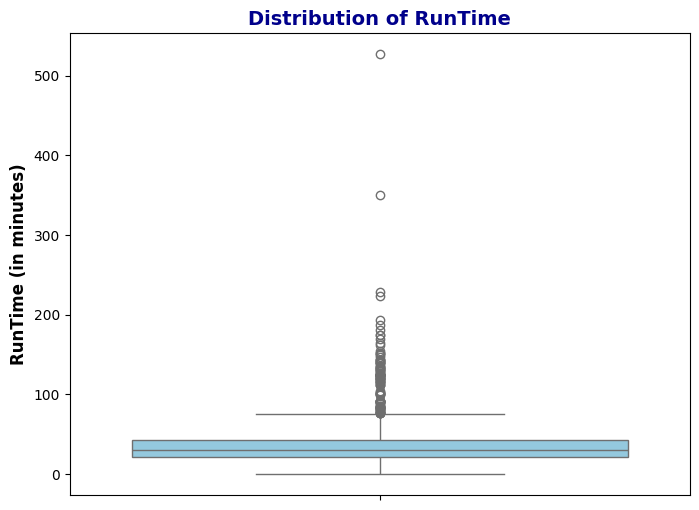

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["RunTime"], color="skyblue")

plt.title("Distribution of RunTime", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("RunTime (in minutes)", fontsize=12, fontweight='bold', color='black')

plt.savefig("runtime_distribution.png")  # Save as static image for GitHub
plt.show()


## TOP LOWEST Average RUN TIME

                                   Movie  RunTime
70               DC Nation's Farm League      1.0
93                           Green Arrow      1.0
22         Batman Heroes: Alexander Knox      2.0
23    Batman Heroes: Commissioner Gordon      2.0
24            Batman Heroes: Harvey Dent      2.0
25             Batman Heroes: Vicki Vale      2.0
31   Batman Returns Villains: Max Shreck      2.0
33         Batman Villains: Bob the Goon      2.0
91                          Gotham Girls      2.0
131                                 Lobo      2.0


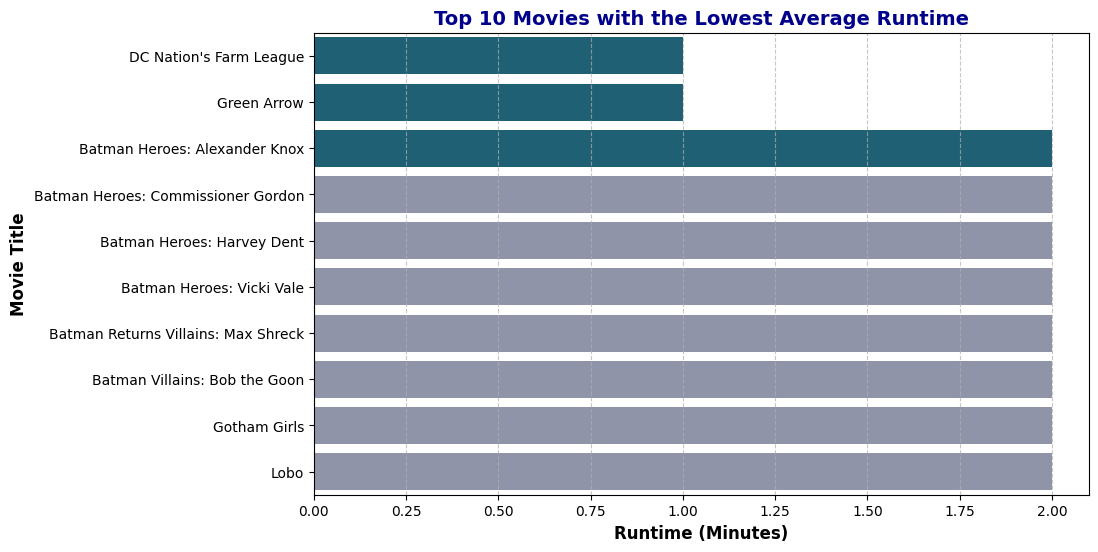

In [ ]:
df["RunTime"] = pd.to_numeric(df["RunTime"].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

df_cleaned = df.dropna(subset=["RunTime"])
df_cleaned = df_cleaned[df_cleaned["RunTime"] > 0]


df_cleaned = df_cleaned.groupby("Movie", as_index=False).agg({"RunTime": "mean"})

top_lowest_runtime = df_cleaned.nsmallest(10, "RunTime")

print(top_lowest_runtime[["Movie", "RunTime"]])

plt.figure(figsize=(10, 6))
colors = ["#126782" if i < 3 else "#8C92AC" for i in range(len(top_lowest_runtime))]

sns.barplot(y=top_lowest_runtime["Movie"], x=top_lowest_runtime["RunTime"], palette=colors)

plt.title("Top 10 Movies with the Lowest Average Runtime", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Runtime (Minutes)", fontsize=12, fontweight='bold', color='black')
plt.ylabel("Movie Title", fontsize=12, fontweight='bold', color='black')

plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig("lowest_runtime.png")  # Save as static image for GitHub
plt.show()


## TOP HIGHEST Average RUN TIME

                                  Movie     RunTime
112                         Frankenpimp  194.000000
272                          The Oscars  193.166667
19                    Avengers: Endgame  181.000000
251               The Dark Knight Rises  164.000000
43   Batman v Superman: Dawn of Justice  152.000000
250                     The Dark Knight  152.000000
306                   Wonder Woman 1984  151.000000
20               Avengers: Infinity War  149.000000
76           Captain America: Civil War  147.000000
11                              Aquaman  143.000000


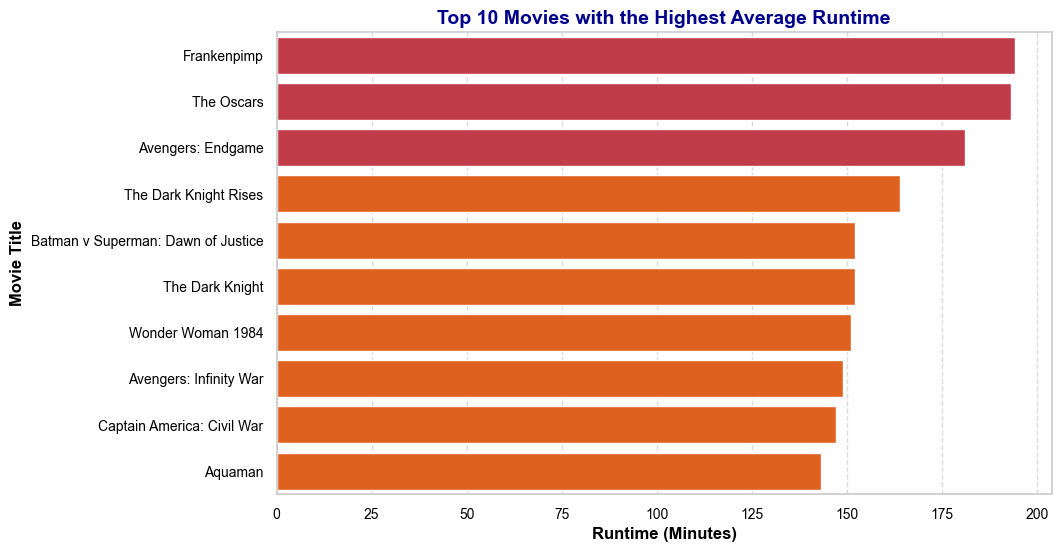

In [ ]:

sns.set(style="whitegrid")

df["RunTime"] = pd.to_numeric(df["RunTime"].astype(str).str.extract(r'(\d+)')[0], errors="coerce")

df_cleaned = df.dropna(subset=["RunTime"]).groupby("Movie", as_index=False).agg({"RunTime": "mean"})

top_highest_runtime = df_cleaned.nlargest(10, "RunTime")

print(top_highest_runtime[["Movie", "RunTime"]])


plt.figure(figsize=(10, 6))
colors = ["#D72638" if i < 3 else "#FF5700" for i in range(len(top_highest_runtime))]

sns.barplot(y=top_highest_runtime["Movie"], x=top_highest_runtime["RunTime"], palette=colors)

plt.title("Top 10 Movies with the Highest Average Runtime", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Runtime (Minutes)", fontsize=12, fontweight='bold', color='black')
plt.ylabel("Movie Title", fontsize=12, fontweight='bold', color='black')

plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.savefig("highest_runtime.png")
plt.show()

# IMDB SCORE

IMDB Score data visualization characteristics categorized.

In [21]:
numeric_features = ['IMDB_Score']

### Mean IMDB Score

In [22]:
mean_imdb_score = df['IMDB_Score'].mean()
print(f"Mean IMDB Score: {mean_imdb_score}")


Mean IMDB Score: 6.877337278106509


### Mode IMDB Score

In [32]:
mode_imdb_score = df['IMDB_Score'].mode()
mode_imdb_score


0    0.0
Name: IMDB_Score, dtype: float64

In [24]:
len( df['IMDB_Score'].dropna())

1690

In [25]:
len(mode_imdb_score)

1

In [28]:
if len(df['IMDB_Score'].dropna()) == len(mode_imdb_score) :
    print("There is no mode")

### Median IMDB Score

In [29]:
median_imdb_score = df['IMDB_Score'].median()
print(f"Median IMDB Score: {median_imdb_score}")

Median IMDB Score: 7.8


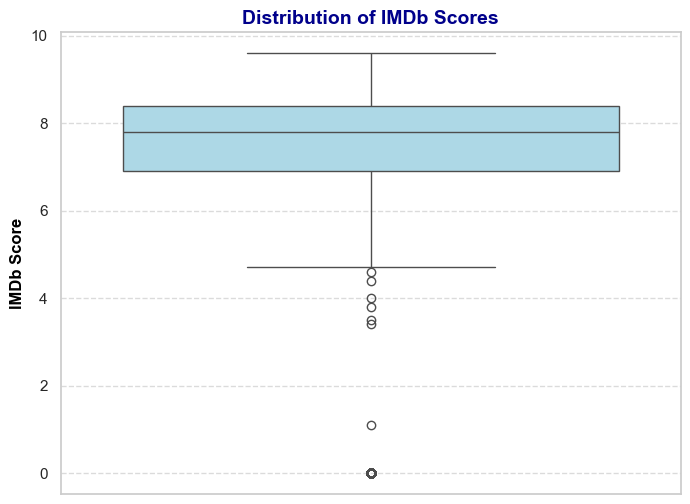

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=df["IMDB_Score"], color="blue", fliersize=6, linewidth=1, boxprops=dict(facecolor='lightblue'))

plt.title("Distribution of IMDb Scores", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("IMDb Score", fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig("imdb_score_boxplot.png")
plt.show()

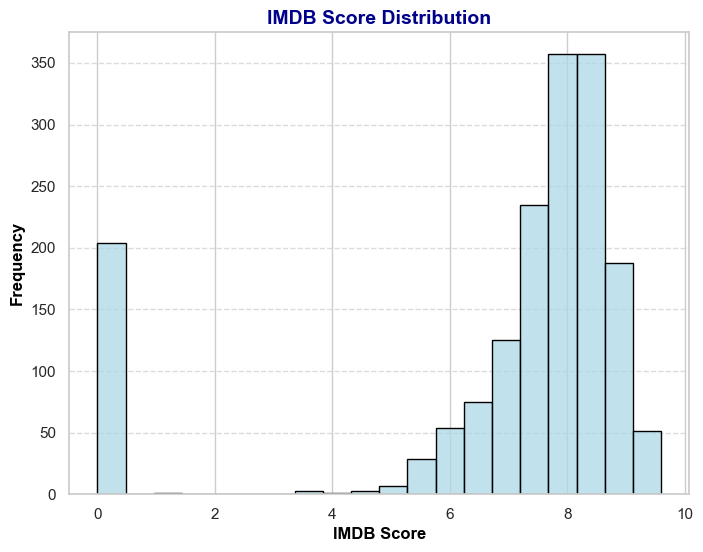

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df["IMDB_Score"], bins=20, color="lightblue", edgecolor="black")

plt.title("IMDB Score Distribution", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("IMDB Score", fontsize=12, fontweight='bold', color='black')
plt.ylabel("Frequency", fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("imdb_score_histogram.png")
plt.show()

In [51]:


# Generate the scatter plot
fig = px.scatter(df, x='IMDB_Score', y='Genre', 
                 title='IMDB Score by Genre', 
                 labels={'IMDB_Score': 'IMDB Score', 'Genre': 'Genre'},
                 color='IMDB_Score', 
                 color_continuous_scale=px.colors.sequential.Blues)

fig.update_traces(marker=dict(size=8, line=dict(width=1, color='black')))

fig.update_layout(
    title_font=dict(size=24, color='darkblue'),
    xaxis_title_font=dict(size=18, color='black'),
    yaxis_title_font=dict(size=18, color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

# Save as PNG (high quality)
fig.write_image("imdb_score_by_genre.png", scale=2)

# Show the figure
fig.show()

### Lowest and Highest Rated Movies

Top 7 Movies:
                        Movie  IMDB_Score
382   Agents of S.H.I.E.L.D.         9.6
1303               The Flash         9.6
1260           Young Justice         9.6
1401                 Lucifer         9.5
1636                Watchmen         9.5
310             The Punisher         9.5
409              The Sandman         9.5
Bottom 7 Movies:
                                  Movie  IMDB_Score
513                        Frankenpimp         1.1
437                           Catwoman         3.4
522       Aquaman: Battle for Atlantis         3.5
415                     Batman & Robin         3.8
589  Superman: The Mysterious Mr. Mist         4.6
86      Iron Man & Hulk: Heroes United         4.7
476                           Blankman         5.0


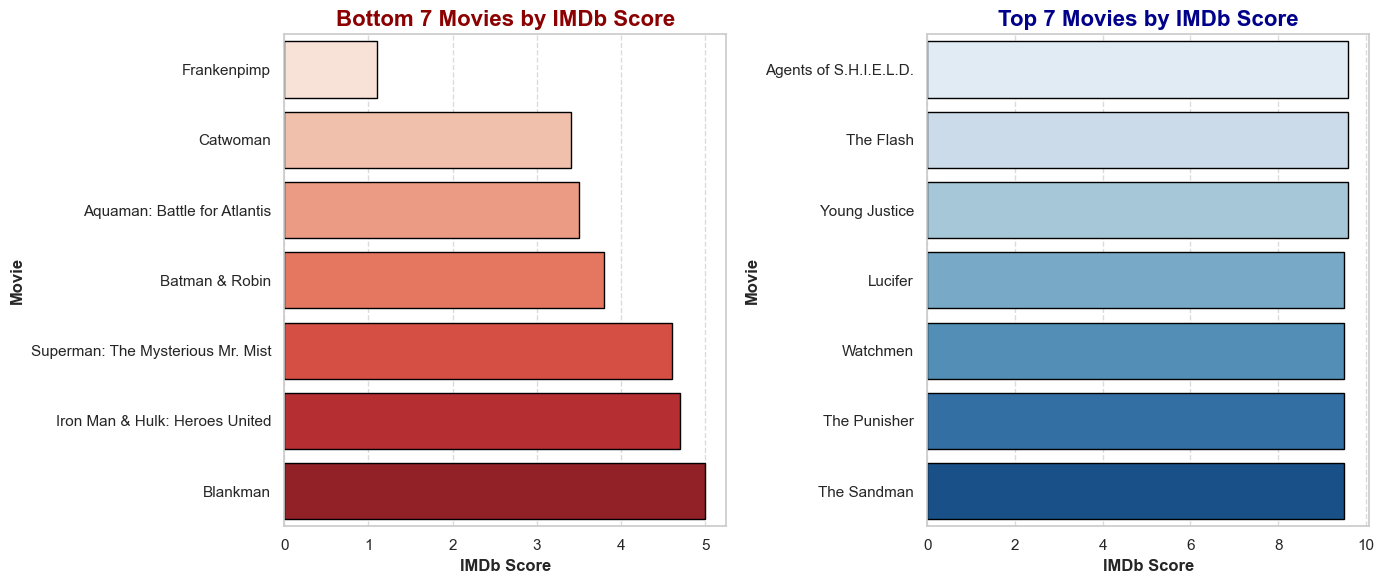

In [ ]:



df = df.drop_duplicates()
df_filtered = df.sort_values(by='IMDB_Score', ascending=False).drop_duplicates(subset=['Movie'])
df_filtered = df_filtered[(df_filtered['IMDB_Score'] > 0) & (df_filtered['IMDB_Score'] <= 10)]


bottom_7_movies = df_filtered.sort_values(by='IMDB_Score', ascending=True).head(7)
top_7_movies = df_filtered.sort_values(by='IMDB_Score', ascending=False).head(7)

print("Top 7 Movies:\n", top_7_movies[['Movie', 'IMDB_Score']])
print("Bottom 7 Movies:\n", bottom_7_movies[['Movie', 'IMDB_Score']])


sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.barplot(data=bottom_7_movies, x="IMDB_Score", y="Movie", ax=axes[0], palette="Reds", edgecolor="black")
axes[0].set_title("Bottom 7 Movies by IMDb Score", fontsize=16, fontweight='bold', color='darkred')
axes[0].set_xlabel("IMDb Score", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Movie", fontsize=12, fontweight='bold')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)


sns.barplot(data=top_7_movies, x="IMDB_Score", y="Movie", ax=axes[1], palette="Blues", edgecolor="black")
axes[1].set_title("Top 7 Movies by IMDb Score", fontsize=16, fontweight='bold', color='darkblue')
axes[1].set_xlabel("IMDb Score", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Movie", fontsize=12, fontweight='bold')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()


plt.savefig("top_bottom_movies_imdb.png", dpi=300, bbox_inches='tight')

plt.show()


# YEAR


Number of Years or Year data visualization characteristics categorized.

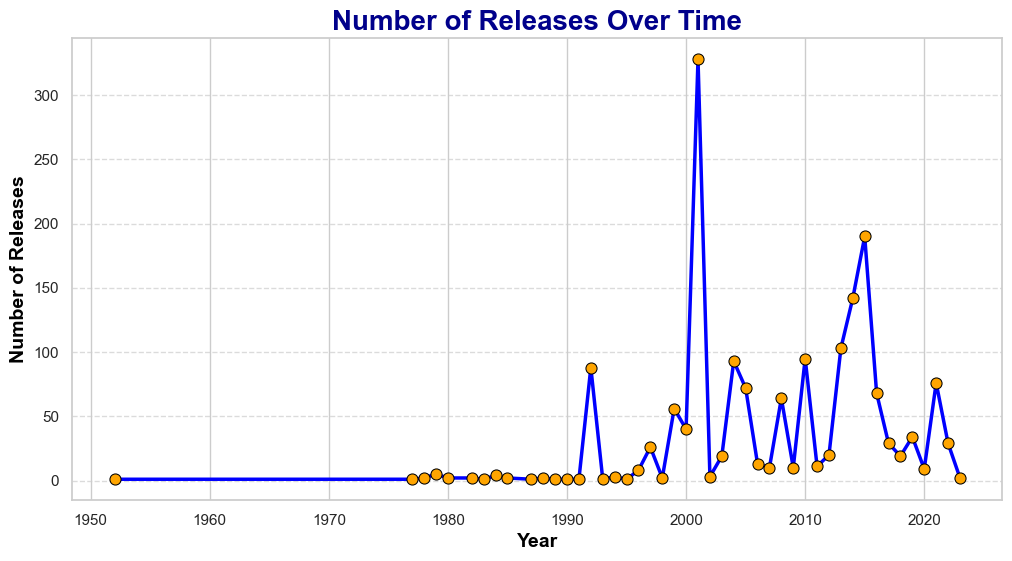

In [ ]:


release_counts = df_replacecopy.groupby('Year').size().reset_index(name='Count')

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))

sns.lineplot(data=release_counts, x="Year", y="Count", marker='o', color="blue", linewidth=2.5, markersize=8, markerfacecolor="orange", markeredgecolor="black")

plt.title("Number of Releases Over Time", fontsize=20, fontweight="bold", color="darkblue")
plt.xlabel("Year", fontsize=14, fontweight="bold", color="black")
plt.ylabel("Number of Releases", fontsize=14, fontweight="bold", color="black")

plt.grid(axis='y', linestyle="--", alpha=0.7)


plt.savefig("releases_over_time.png", dpi=300, bbox_inches="tight")


plt.show()

# GENRE

Genre  data visualization characteristics categorized.

In [49]:

# Generate the figure
fig = px.bar(genre_counts, x="Genre", y="Count", 
             title="Distribution of Genres",
             labels={"Genre": "Genre", "Count": "Number of Movies"},
             color="Genre", text="Count")

fig.update_traces(texttemplate='%{text}', textposition='outside', 
                  marker=dict(line=dict(width=1, color='black')))

fig.update_layout(
    title_font=dict(size=24, color='darkblue'),
    xaxis_title_font=dict(size=18, color='black'),
    yaxis_title_font=dict(size=18, color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

# Save as PNG
fig.write_image("genre_distribution.png", scale=2)  # High-quality image

# Show the figure (optional)
fig.show()

### Top Rated Movies Genre

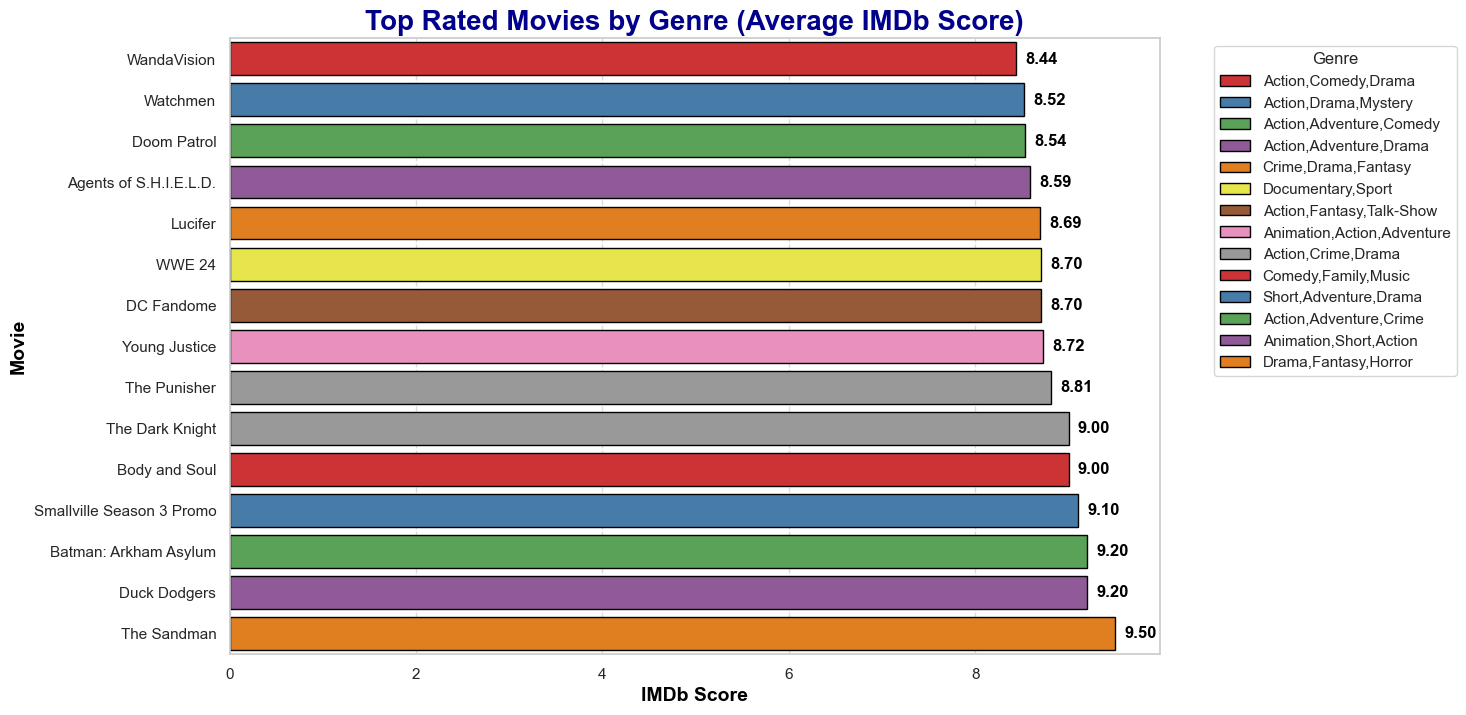

In [40]:


df_cleaned = df.groupby(['Movie', 'Genre'], as_index=False).agg({'IMDB_Score': 'mean'})
df_cleaned = df_cleaned[(df_cleaned['IMDB_Score'] > 0) & (df_cleaned['IMDB_Score'] <= 10)]
top_movies = df_cleaned.sort_values(by='IMDB_Score', ascending=False).head(15)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=top_movies.sort_values(by="IMDB_Score", ascending=True), 
    x="IMDB_Score", 
    y="Movie", 
    hue="Genre", 
    palette="Set1",
    edgecolor="black"
)

for index, value in enumerate(top_movies.sort_values(by="IMDB_Score", ascending=True)["IMDB_Score"]):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center', fontsize=12, fontweight="bold", color="black")

plt.title("Top Rated Movies by Genre (Average IMDb Score)", fontsize=20, fontweight="bold", color="darkblue")
plt.xlabel("IMDb Score", fontsize=14, fontweight="bold", color="black")
plt.ylabel("Movie", fontsize=14, fontweight="bold", color="black")

plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("top_rated_movies_by_genre.png", dpi=300, bbox_inches="tight")
plt.show()



<hr style=\"border:2.5px solid #126782\"></hr>

# **Hypothesis**

### *Runtime*


1. **Distribution of Runtime** <br>
Hypothesis: The distribution of movie runtimes is right-skewed, meaning most movies have a moderate length, but some outliers exist with exceptionally long runtimes.
Reasoning: The boxplot shows that the majority of movies have runtimes clustered in a lower range, while a few extreme outliers exceed 200+ minutes. <br>
2. **Lowest Runtime** <br>
Hypothesis: Short films, including animated or special features, have the lowest runtimes, with some being as short as 1 or 2 minutes.
Reasoning: The dataset includes movies like DC Nation’s Farm League and Green Arrow, which have runtimes of only 1 minute, suggesting the presence of very short films. <br>
3. **Highest Runtime** <br>
Hypothesis: Blockbuster superhero movies, award shows, or extended editions of films tend to have the longest runtimes, often exceeding 150 minutes.
Reasoning: The longest movies include Avengers: Endgame (181 min), The Dark Knight Rises (164 min), and The Oscars (193 min). This suggests that major action movies and televised events contribute to the longest runtimes.
Would you like to refine these hypotheses further or explore additional aspects like genre influence?

### *IMDB Score*


1. **Mean Score**<br>
The average IMDB score of movies in the dataset is between 5 and 7, as most movies tend to have mid-range ratings. <br>

2. **Mode Score** <br>
The most frequently occurring IMDB score is likely around 6 or 7, as these ratings are common for most movies.<br>

3. **Median Score** <br>
The median IMDB score in the dataset is expected to be close to the mean score, suggesting a relatively normal distribution.<br>

4. **Distribution of IMDB Scores** <br>
The distribution of IMDB scores follows a normal or slightly left-skewed pattern, with more movies receiving mid-range scores than extremely high or low scores. <br>

5. **IMDB Score by Genre** <br>
Certain genres, such as drama and thriller, tend to have higher IMDB scores on average compared to comedy or action movies.

6. **Lowest Rated Movies** <br>
The lowest-rated movies in the dataset have IMDB scores below 3, potentially due to poor production quality or negative audience reception. <br>

7. **Highest Rated Movies** <br>
The highest-rated movies in the dataset have IMDB scores above 8, likely belonging to critically acclaimed or fan-favorite films.

### *Year*


1. **Average Release of Movies per Year** <br>
The number of movies released per year has increased over time, with a peak in recent years due to the expansion of the film industry and streaming platforms.


### *Genre*


1. **Distribution of Genre** <br>
The majority of movies belong to action, adventure, and animation genres, making them the most dominant in the dataset.
Less common genres, such as talk shows and news, have significantly fewer movies compared to mainstream genres like adventure and crime.
Animated and adventure-based movies are more frequently produced due to their broad audience appeal and commercial success.<br>
2. **Top Rated Movies by Genre** <br>
Movies that belong to multiple genres, such as action, comedy, and drama, tend to receive higher IMDb ratings compared to single-genre films.
Animated and superhero-themed movies generally receive higher IMDb scores due to their loyal fanbase and franchise popularity.
Niche genres, such as documentary and sport, might receive consistently high ratings from dedicated audiences but have fewer movies overall.

**Based on the Top Rated Movies by Genre (Average IMDb Score) chart, the highest-rated movies are:**

1. The Sandman (9.50)
2. Duck Dodgers (9.20)
3. Batman: Arkham Asylum (9.20)
4. Smallville Season 3 Promo (9.10)
5. Body and Soul (9.00)
6. The Dark Knight (9.00)
7. The Punisher (8.81)
8. Young Justice (8.72)
9. DC Fandome (8.70)
10. WWE 24 (8.70)

<hr style=\"border:2.5px solid #126782\"></hr>

# **Conclusion**


This report provides an in-depth analysis of movie data, covering various aspects such as IMDb scores, genre distribution, top-rated movies, and yearly release trends. Through statistical examination and visualization, we uncovered meaningful patterns that reflect audience preferences, industry trends, and the characteristics of highly rated films.

The IMDb score analysis explored key statistical measures such as the mean, mode, and median, offering insights into how movies generally perform based on user ratings. The distribution of IMDb scores indicated that while most movies fall within an average rating range, certain genres and specific movies receive exceptionally high or low ratings. Additionally, examining highest- and lowest-rated movies revealed that certain genres consistently produce top-rated films, reinforcing the idea that specific storytelling styles, production values, and audience engagement contribute to high IMDb scores.

The distribution of genres analysis highlighted a significant concentration of movies in popular genres such as Animation, Action, and Adventure, while less mainstream genres, such as Documentary, Crime, and Fantasy, had fewer representations. This suggests that audience demand and industry production largely favor action-packed and visually engaging storytelling.

In the top-rated movies by genre analysis, it was evident that Action, Drama, and Adventure genres frequently dominate the highest-rated lists, with animated and superhero-related films receiving strong audience appreciation. These findings indicate that high production quality, compelling narratives, and strong character development play a crucial role in determining movie success.

When examining movie release trends by year, the analysis aimed to determine the average number of movies released per year and identify patterns or fluctuations in production. While the dataset contained some missing or unclear year values (represented by dashes), the general trend suggested a consistent growth in movie production over time, reflecting the increasing demand for entertainment content.

Final Thoughts
The findings from this report provide valuable insights into the film industry's trends and audience preferences. The dominance of certain genres in both quantity and rating suggests that industry stakeholders, such as producers, directors, and streaming platforms, can leverage this data to make informed decisions about future projects. Furthermore, the IMDb score analysis reaffirms the importance of high-quality storytelling and audience engagement in determining a movie’s success.

For further research, additional factors such as director influence, production budgets, audience demographics, and marketing impact could be explored to gain deeper insights into what drives both popularity and high ratings in the film industry.